In [5]:
import numpy as np
import pandas as pd
import time
import sys
import os
import h5py
from joblib import Parallel, delayed
sys.path.append('../')
from packages import actv_analysis, svm, load_csv, stats, objects, test_codes
import pickle
import re
import glob
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.preprocessing import MinMaxScaler

# Congruent matrix

In [25]:
def congruent_matrix(constant):
    # Define the ranges
    numbers = np.arange(2, 22, 2)  # 2, 4, 6, ..., 20
    sizes = np.arange(3, 14, 1)    # 3, 4, 5, ..., 13

    # Calculate the upper bound of the constant
    normalized_size_difference = 1 / (sizes.max() - sizes.min())
    upper_bound_of_constant = normalized_size_difference / 2
    
    # Check if the provided constant exceeds the upper bound
    if constant >= upper_bound_of_constant:
        return "Error: The provided constant exceeds the upper bound. It should be less than {:.5f}".format(upper_bound_of_constant)

    # Create the matrix
    matrix = np.zeros((10, 11))  # The size is set to 10x11 to match the length of numbers and sizes

    # Populate the matrix
    for i, number in enumerate(numbers):
        for j, size in enumerate(sizes):
            normalized_number = (number - numbers.min()) / (numbers.max() - numbers.min())
            normalized_size = (size - sizes.min()) / (sizes.max() - sizes.min())
            matrix[i, j] = (normalized_number + normalized_size) / 2

    # Add the constant to all cells except (0,0) and (9,10)
    matrix[1:, :] += constant  # Add to all rows except the first
    matrix[:, 1:] += constant  # Add to all columns except the first
    matrix[-1, :-1] -= constant  # Subtract from the last row except the last column
    matrix[:-1, -1] -= constant  # Subtract from the last column except the last row

    return matrix

In [30]:
congmatrix = congruent_matrix(0.04)

<Axes: >

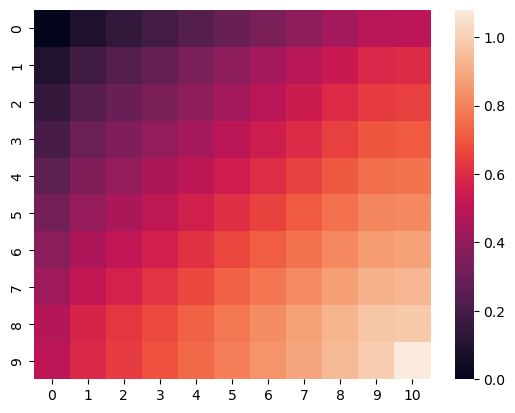

In [31]:
sns.heatmap(congmatrix)